In [1]:
# based on https://towardsdatascience.com/pytorch-tutorial-distilled-95ce8781a89c
# also based on http://pytorch.org/tutorials/beginner/pytorch_with_examples.html#warm-up-numpy
import matplotlib.pyplot as plt
from __future__ import print_function
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np

torch.manual_seed(12)
np.random.seed(12)



In [2]:
# generate dataset
N = 8 # data points
lr = 1e-6
epochs = 10000
x = Variable(torch.Tensor(1,N).uniform_(1,20), requires_grad=False)
a, b, c  = 0, 2, 3
y = a*x**2 + b*x + c
# print(in_data,"\n",out_data)

In [3]:
w1 = Variable(torch.randn(1,1), requires_grad=True)
#w2 = Variable(torch.randn(1,1), requires_grad=True)
b1 = Variable(torch.randn(1,1), requires_grad=True)
#b2 = Variable(torch.randn(1,1), requires_grad=True)


for step in range(epochs):
    # forward pass
    x1 = x
    y1 = w1*x1 + b1
    
    # define loss function and backprop
    loss = (y1 - y).pow(2).sum()
    loss.backward()
    w1.data -= lr * w1.grad.data
    b1.data -= lr * b1.grad.data

    # zero gradients
    w1.grad.data.zero_()
    b1.grad.data.zero_()




In [4]:
# make my own numpy implementation
x_np = np.array(x.data.numpy()).T
w_np = np.random.randn(2,1)

# output dataset            
y_np = a*x_np**2 + b*x_np + c
x_np = np.insert(x_np, 1, 1, axis = 1) ### insert bias voltage of 1
w_np = np.random.randn(2,1)

for step in range(epochs):
    # forward propagation
    x1_np = x_np
    y1_np = x1_np.dot(w_np)   

    #update weights
    grad = -(y_np-y1_np)*y1_np
    
    dw_np = -lr*np.dot(x_np.T,grad)
    w_np += dw_np # needs += for b>0 and -= for b<0 in the polynomial

chi2ndf_np = 2.086339 chi2ndf = 1.829520


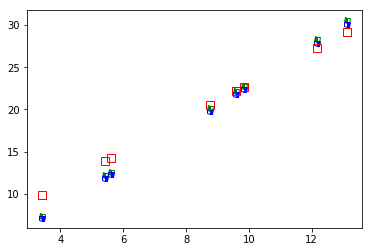

In [5]:
# test what was learned with PyTorch
x1 = x
y1 = w1*x1 + b1

loss = (y1 - y).pow(2).sum()
chi2ndf = loss/N

# check what was learned with Python
x1_np = x_np
y1_np = x1_np.dot(w_np)

loss_np = ((y1_np - y_np)**2).sum()
chi2ndf_np = loss_np/N

print ("chi2ndf_np = %f"%chi2ndf_np+" chi2ndf = %f"%chi2ndf)

plt.subplots()
plt.plot(x1.data.numpy(), y1.data.numpy(), 'gs', label='PyTorch', fillstyle='left', markersize=5) 
plt.plot(x1_np[:,0], y1_np, 'bs',label='Numpy', fillstyle='right', markersize=5) 
plt.plot(x.data.numpy(), y.data.numpy(), 'rs', label='True',fillstyle='none', markersize=8)
plt.show()


In [63]:
y_np

array([[27.154125],
       [29.009487],
       [26.12367 ],
       [ 9.797459],
       [42.203094],
       [37.082096],
       [ 9.772301],
       [21.93364 ]], dtype=float32)